# Regression Models
## Prashanth Kannadaguli
### Senior Data Science Trainer 

## Learning Objectives

At the end of the experiment, you will be able to:

* have an overview of the basics of Machine Learning

* understand the implementation of Train/Test Split

* develop an understanding of Least Squares, Learning Curves

* perform Linear Regression

* have an understanding of Regularization of Linear Models 


### Introduction

**Machine learning** is a subfield of artificial intelligence (AI). The goal of machine learning is to understand the structure of data and model (fit) the data so that it can accurately predict the label or output for similar unseen data.

**Machine Learning use cases:**

Detecting tumors in brain scans, automatically classifying news articles, automatically flagging offensive comments on discussion forums, 
summarizing long documents automatically, 
creating a chatbot or a personal assistant, 
detecting credit card fraud, 
making your app react to voice commands, 
building an intelligent bot for a game.

**Machine Learning Workflow:**

1. Frame the ML problem by looking at the business need 
2. Gather the data and do Data Munging/Wrangling for each subproblem 
3. Explore different models, perform V&V and shortlist promising candidates 
4. Fine-tune shortlisted models and combine them together to form the final  solution 
5. Present your solution  
6. Deploy 


**Model training and testing**

![wget](https://cdn.iisc.talentsprint.com/CDS/Images/model_train_test1.png)



### Training, Validation, and Test Set

A machine learning algorithm splits the Dataset into two sets. 

Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into two subsets:

**Training Dataset:** The sample of data used to fit the model.

**Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

We usually split the data as 80% for training stage and 20% for testing stage. 70% train and 30% test or 75% train and 25% test are also often used. 

**Validation Set:** This is a separate section of your dataset that you will use during training to get a sense of how well your model is doing on data that are not being used in training.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets.


<img src="https://miro.medium.com/max/700/1*aNPC1ifHN2WydKHyEZYENg.png" alt="drawing" width="500"/>


#### Prerequisites for using train_test_split()

We will use scikit-learn, or sklearn which has many packages for data science and machine learning. 

**Applying train_test_split()**

You need to import:

1.   train_test_split()
2.   NumPy 

We import NumPy because, in supervised machine learning applications, you’ll typically work with two such sequences:

* A two-dimensional array with the inputs (x)
* A one-dimensional array with the outputs (y)






**sklearn.model_selection.train_test_split(arrays, options)**

* **arrays** is the sequence of lists, NumPy arrays, pandas DataFrames, or similar array-like objects that hold the data you want to split. All these objects together make up the dataset and must be of the same length.

* **options** are the optional keyword arguments that you can use to get desired behavior:

  * **train_size** is the number that defines the size of the training set. 

  * **test_size** is the number that defines the size of the test set. You should provide either train_size or test_size. 
      * If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent. 
      * If float (eg 0.25), it represents the proportion of the dataset to include in the test split and should be between 0.0 and 1.0. 
      * If int (eg. 4), it represents the absolute number of test samples, eg. 4 samples of 12. 
      * If None, the value is set to the complement of the train size. 
      * If train_size is also None, it will be set to 0.25.

  * **random_state** is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.

  * **shuffle** is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.

  * **stratify** is an array-like object that, if not None, determines how to use a stratified split.



### Importing required packages

In [ ]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn Libraries
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Let us use a small dataset to understand how to implement a train and test split

#### Creating a simple dataset to work with

In [ ]:
# inputs in the two-dimensional array X 


# outputs in the one-dimensional array y


#### Splitting input and output datasets

### Develop an understanding of Least Squares

**Least Squares** method is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve.

**Calculate Line Of Best Fit**

A more accurate way of finding the line of best fit is the least square method.

Use the following steps to find the equation of line of best fit for a set of ordered pairs $(x_1,y_1),(x_2,y_2),...(x_n,y_n)$.

**Step 1:** Calculate the slope ‘m’ by using the following formula:

$$m = \frac{\sum \left ( x-\bar{x} \right )* \left ( y-\bar{y} \right )}{\sum \left ( x-\bar{x} \right )^{2}}$$


**Step 2:** Compute the y -intercept of the line by using the formula:

$$c = y - mx$$

**Step 3:** Substitute the values in the final equation

$$y = mx + c$$

* y: dependent variable
* m: the slope of the line
* x: independent variable
* c: y-intercept


As an example, we will try to find the least squares regression line for the below data set:

\begin{array} {|r|r|}\hline Hours Spent & Grade \\\hline 6 & 82 \\ \hline 10 & 88 \\ \hline 2 & 56 \\ \hline 4 & 64 \\ \hline 6 & 77 \\ \hline 7 & 92 \\ \hline 0 & 23 \\ \hline 1 & 41 \\ \hline 8 & 80 \\ \hline 5 & 59 \\ \hline 3 & 47 \\ \hline  \end{array}

$x$ = HoursSpent

$y$ = Grade

$\bar{x}$ = 4.72

$\bar{y}$ = 64.45


\begin{array} {|r|r|}\hline Hours Spent & Grade &  x - \bar{x}  & y - \bar{y} & (x - \bar{x})*(y - \bar{y}) \\ \hline 6 & 82 & 1.27 & 17.55 & 22.33 \\ \hline 10 & 88 & 5.27 & 23.55 & 124.15 \\ \hline 2 & 56 & -2.73 & -8.45 & 23.06 \\ \hline 4 & 64 & -0.73 & -0.45 & 0.33 \\ \hline 6 & 77 & 1.27 & 12.55 & 15.97 \\ \hline 7 & 92 & 2.27 & 27.55 & 62.60 \\ \hline 0 & 23 & -4.73 & -41.45 & 195.97 \\ \hline 1 & 41 & -3.73 & -23.42 & 87.42 \\ \hline 8 & 80 & 3.27 & 15.55 & 50.88 \\ \hline 5 & 59 & 0.27 & -5.45 & -1.49 \\ \hline 3 & 47 & -1.73 & -17.45 & 30.15 \\ \hline  \end{array}


$$\sum \left ( x-\bar{x} \right )* \left ( y-\bar{y} \right ) = 611.36$$

$$\sum \left ( x-\bar{x} \right )^{2} = 94.18$$

$$m = \frac{611.36}{94.18}$$

$$m = 6.49$$

**Calculate the intercept:**

$$c = y - mx$$

$$c = 64.45-(6.49*4.72)$$

$$c = 64.45 – 30.63$$

$$c = 30.18$$

Now that we have all the values to fit into the equation. If we want to know the predicted grade of someone who spends 2.35 hours on their essay, all we need to do is substitute that in for X. 

$$y =  (6.49 * X) + 30.18 $$

$$y = (6.49 * 2.35) + 30.18$$

$$y = 45.43$$










### Example: Ordinary least squares Linear Regression

Ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

Geometrically, this is seen as the sum of the squared distances, parallel to the axis of the dependent variable, between each data point in the set and the corresponding point on the regression surface—the smaller the differences, the better the model fits the data.

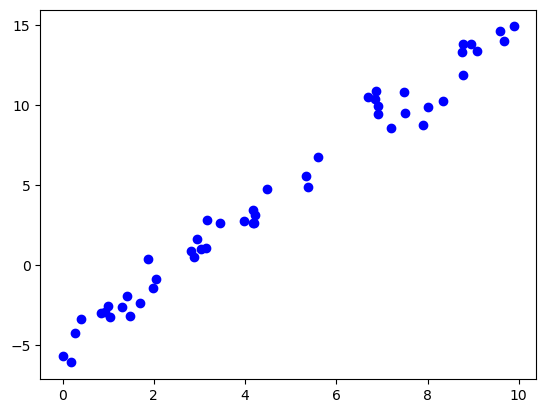

In [ ]:
# Generating Sample data 



**Using Scikit-Learn's Linear Regression estimator to fit the above data and construct the best-fit line**

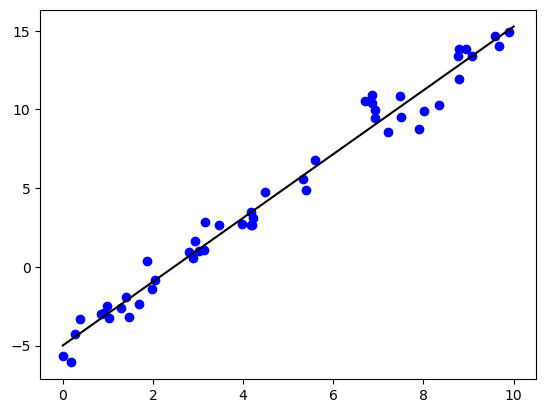

### Learning Curves

Learning curve in machine learning is used to assess how models will perform with varying numbers of training samples.  This is achieved by monitoring the training and validation scores (model accuracy) with an increasing number of training samples.

Below image showcases 'Learning curves representing high bias and high variance'.

- orange dashed line - represent training 
- blue line - represent validation
- black dashed line - desired model accuracy

![wget](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-19-at-6.22.21-AM-1.png)

### Example: Simple linear regression combined with the polynomial preprocessor

#### Polynomial Features

Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature $X$, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in $X$, e.g. $X^2$. This process can be repeated for each input variable in the dataset, creating a transformed version of each. And, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.

As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.

#### Creating data to fit into the model

#### Learning curve in Scikit-Learn

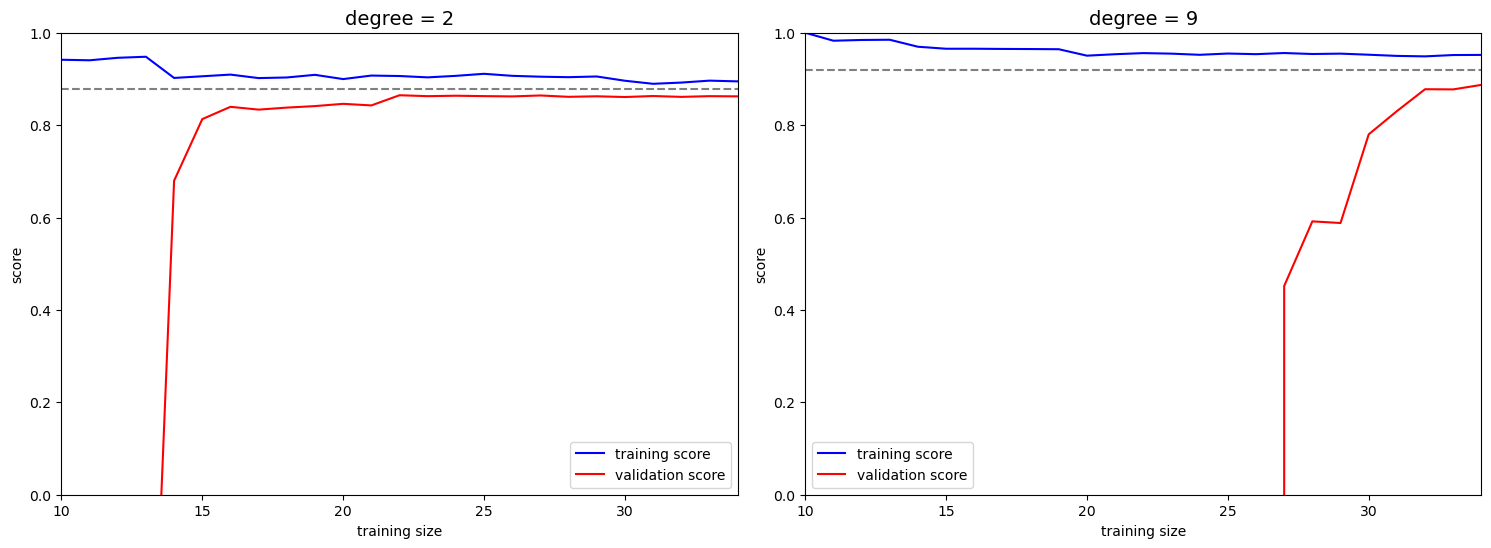

### Example: Machine Learning Workflow using Linear-Regression with Auto-MPG Dataset

#### Dataset

In this example, we will be using the “Auto-MPG” dataset.

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Number of instances: 398

**Problem statement:** Predict the fuel consumption in miles per gallon.

#### Loading Data

In [ ]:
# Read data


Displaying Dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Exploring the dataset

In [ ]:
# print names of the features


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [ ]:
# generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# summary of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### Checking for Missing values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Visualization of Auto-MPG Dataset

#### Creating a pairplot and a heatmap to check which features seems to be more correlated


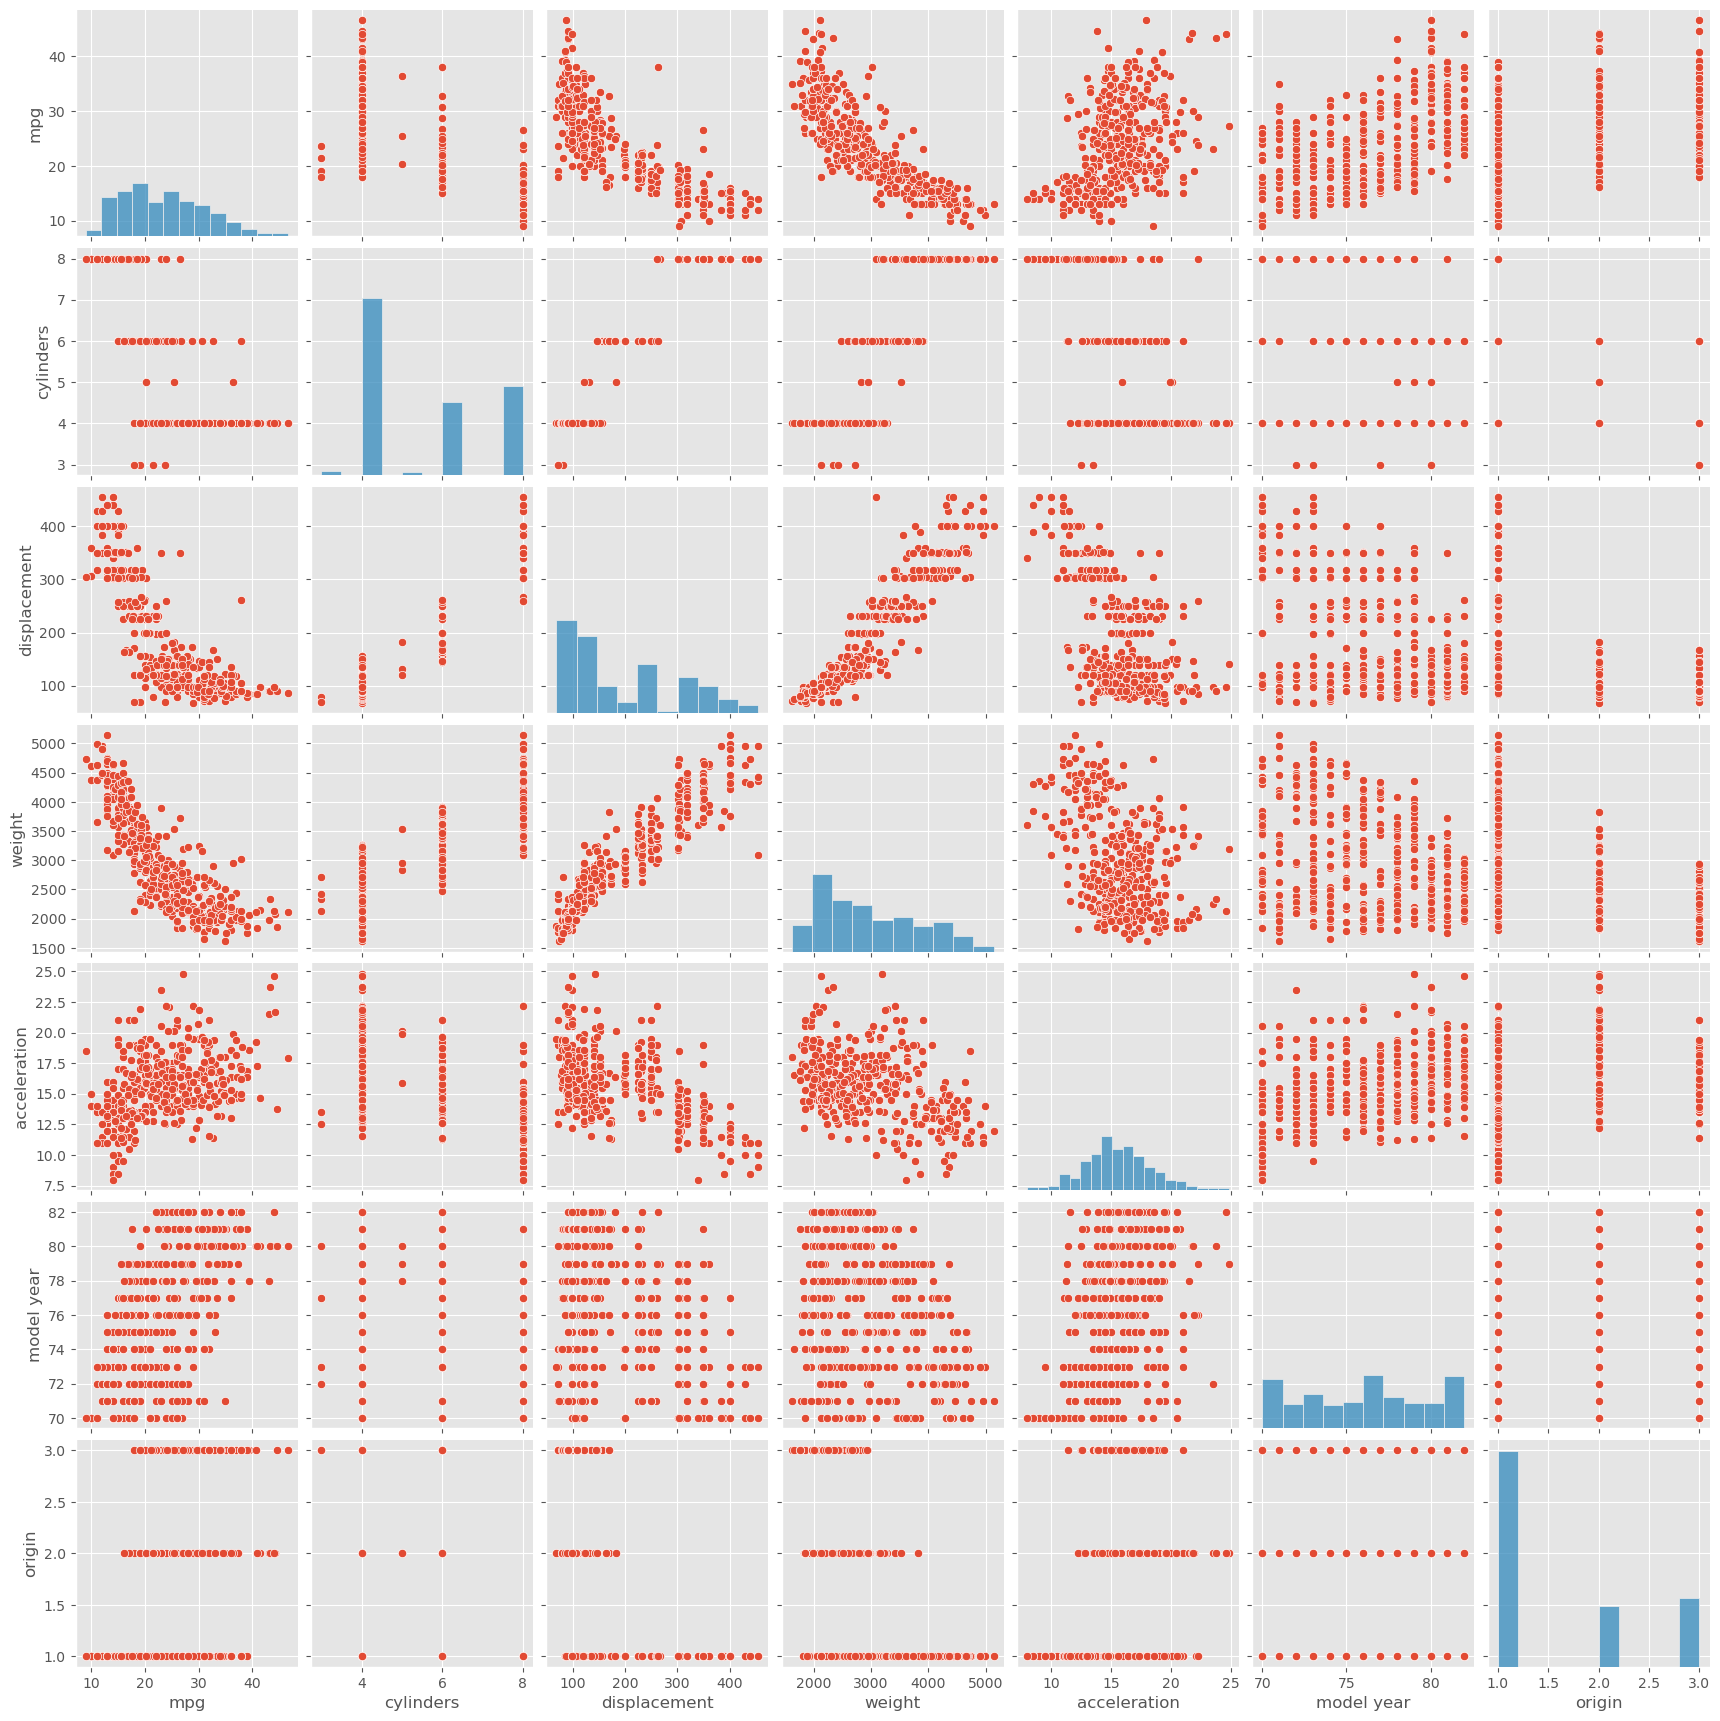

In [ ]:
# Pairplot


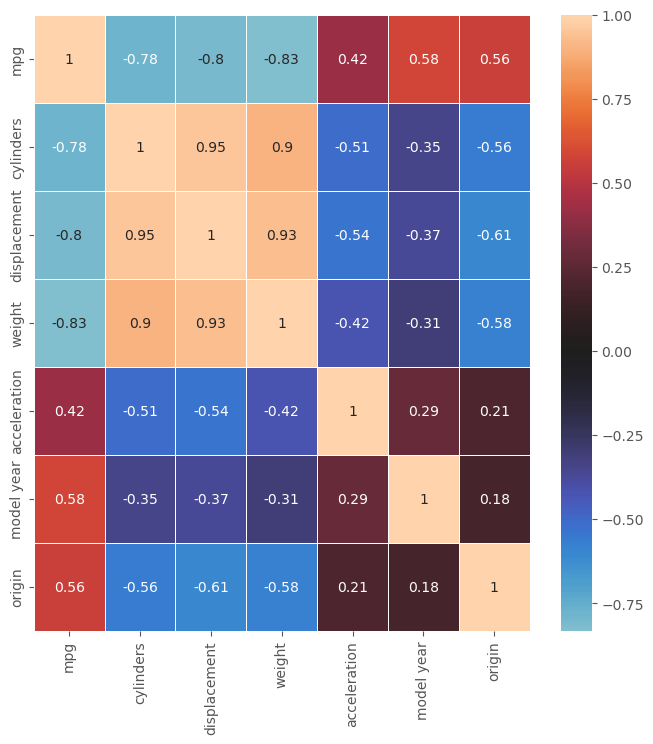

In [ ]:
# Heatmap


From the above plots, we can see that the features cylinders, displacement, and weight are highly correlated. We can use anyone of them for modeling.

### Modeling and Prediction (Linear Regression)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Datatypes of all features


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# Unique values in horsepower column


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# Removing '?' from horsepower column


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# Converting horsepower column datatype from string to float


C:\Users\prash\AppData\Local\Temp\ipykernel_11636\927491711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto['horsepower'] = auto['horsepower'].astype(float)


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# Pridiction features

# Target feature


,displacement,horsepower,acceleration,model year,origin
0,307.0,130.0,12.0,70,1
1,350.0,165.0,11.5,70,1
2,318.0,150.0,11.0,70,1
3,304.0,150.0,12.0,70,1
4,302.0,140.0,10.5,70,1


In [ ]:
# Splitting the Dataset 


,displacement,horsepower,acceleration,model year,origin
125,198.0,95.0,16.5,74,1
385,91.0,67.0,16.2,82,3
61,122.0,86.0,16.5,72,1
377,91.0,68.0,17.6,82,3
352,98.0,65.0,20.7,81,1


In [ ]:
# Instantiating LinearRegression() Model


In [ ]:
# Training/Fitting the Model


LinearRegression()

Testing

In [ ]:
# Making Predictions


In [ ]:
# Evaluating Model's Performance


Mean Absolute Error: 2.761404730121516
Mean Squared Error: 12.691033777670297
Mean Root Squared Error: 3.5624477227982303
Coefficient of Determination: 0.7507064829159636


Predicting the value

Predicted fuel consumption(mpg): 20.757626199359272
Actual fuel consumption(mpg): 21.0


### Regularized Linear Models

A good  way  to  reduce  overfitting  is  to  regularize  the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. 

For a linear model, regularization is typically achieved by constraining the weights of the model. 

Three different ways to constrain the weights:

1. Ridge Regression

2. Lasso Regression

3. Elastic Net




#### **Ridge regression** 

**Ridge regression** or **Tikhonov regularization** is the regularization technique that performs L2 regularization. It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the square of the magnitude of coefficients.

- **sklearn.linear_model.Ridge** is the module used to solve a regression model where the loss function is the linear least squares function and regularization is L2.

#### Ridge Regression with Scikit-Learn

0.7629498741931634

#### **LASSO (Least Absolute Shrinkage and Selection Operator)**

LASSO is the regularisation technique that performs L1 regularisation. It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the summation of the absolute value of coefficients.

 - **sklearn.linear_model.Lasso** is a linear model, with an added regularisation term, used to estimate sparse coefficients.




#### Lasso Regression with Scikit-Learn

In [ ]:
# uses coordinate descent as the algorithm to fit the coefficients
 


Lasso(alpha=0.5)

Once fitted, the model can predict new values as follows:


array([0.75])

In [ ]:
#weight vectors


array([0.25, 0.  ])

In [ ]:
#Calculating intercept


0.75

In [ ]:
#Calculating number of iterations


2

#### Elastic Net Regression with Scikit-Learn

In [ ]:
# uses coordinate descent as the algorithm to fit the coefficients



ElasticNet(alpha=0.5, random_state=0)

Once fitted, the model can predict new values as follows:


array([0.73681643])

In [ ]:
#weight vectors


array([0.26318357, 0.26313923])

In [ ]:
#Calculating intercept


0.47367720941913904

In [ ]:
#Calculating number of iterations


15

### Theory Questions


1. What is the difference between the training set and the test set?

    The training set is a subset of your data on which your model will learn how to predict the dependent variable with the independent variables.

    The test set is the complimentary subset from the training set, on which you will evaluate your model to see if it manages to predict correctly the dependent variable with the independent variables.



2. Why do we split on the dependent variable?

    We want to have well-distributed values of the dependent variable in the training and test set. For example, if we only had the same value of the dependent variable in the training set, our model wouldn't be able to learn any correlation between the independent and dependent variables.




3. What is the purpose of a validation set?

    The Validation Set is a separate section of your dataset that you will use during training to get a sense of how well your model is doing on data that are not being used in training.



4. How do you choose the value of the regularization hyperparameter?

      A common solution to this problem is called holdout validation: you simply hold out part of the training set to evaluate several candidate models and select the best one.
      
      The new held out set is called the validation set (or sometimes the development set, or dev set).



5. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

   If the model performs poorly to new instances, then it has overfitted on the training data. To solve this, we can do any of the following three: get more data, implement a simpler model, or eliminate outliers or noise from the existing data set.